### Import Required Libraries
- Import PyTorch for model building and training.
- Use NumPy for data generation and Matplotlib for plotting.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic 3-Variable Non-linear Data
- Creates 100 samples with 3 features each.
- Computes target values using a quadratic function with added noise.


In [2]:
# Generate synthetic 3-variable non-linear regression data
np.random.seed(42)
X = np.random.rand(100, 3).astype(np.float32)
y = (X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2 + np.random.randn(100) * 0.05).astype(np.float32).reshape(-1, 1)


In [3]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)


### Define 3-Layer Neural Network Using PyTorch Modules
- Uses `nn.Linear` layers to build a model with 2 hidden layers and 1 output layer.
- Applies ReLU activations in the forward pass.


In [4]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.layer1 = torch.nn.Linear(3, 5)   # Input layer to first hidden layer
        self.layer2 = torch.nn.Linear(5, 5)  # First hidden layer to second hidden layer
        self.layer3 = torch.nn.Linear(5, 1)  # Second hidden layer to output layer

    def forward(self, x):
        # Forward pass using ReLU activation function
        x = torch.relu(self.layer1(x))  # Apply ReLU activation after first layer
        x = torch.relu(self.layer2(x))  # Apply ReLU activation after second layer
        x = self.layer3(x)  # Output layer (no activation)
        return x

# Instantiate the model
model = SimpleNN()

### Set Up Loss Function and Optimizer
- Uses Mean Squared Error (MSE) as the loss function for regression.
- Uses Stochastic Gradient Descent (SGD) as the optimizer to update model parameters.


In [5]:
# Loss function (Mean Squared Error)
criterion = torch.nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Train the Neural Network
- Performs forward pass, computes loss, backpropagates gradients, and updates weights.
- Tracks and prints loss every 100 epochs to monitor training progress.


In [6]:
# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    # Zero the gradients from the previous step
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())  # Append loss value to track it

    # Backward pass and optimize
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters using gradients

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 2.284780979156494
Epoch 100, Loss: 0.28618818521499634
Epoch 200, Loss: 0.2801547348499298
Epoch 300, Loss: 0.27564385533332825
Epoch 400, Loss: 0.26950299739837646
Epoch 500, Loss: 0.26096808910369873
Epoch 600, Loss: 0.248879075050354
Epoch 700, Loss: 0.2324497550725937
Epoch 800, Loss: 0.21150104701519012
Epoch 900, Loss: 0.1854446530342102


### Plot Training Loss Curve
- Visualizes how the loss decreases over training epochs.
- Helps evaluate the convergence and effectiveness of the training process.


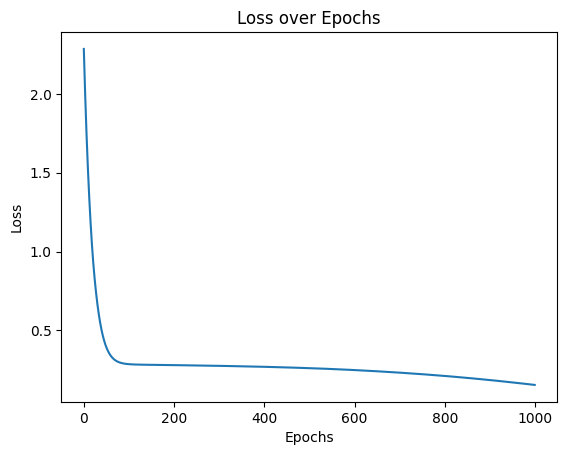

In [7]:
# Plotting the loss curve
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Visualize Data in 4D Using a 3D Scatter Plot
- Plots the 3 input features along X, Y, and Z axes.
- Uses color to represent the corresponding target `y` values, creating a 4D view.


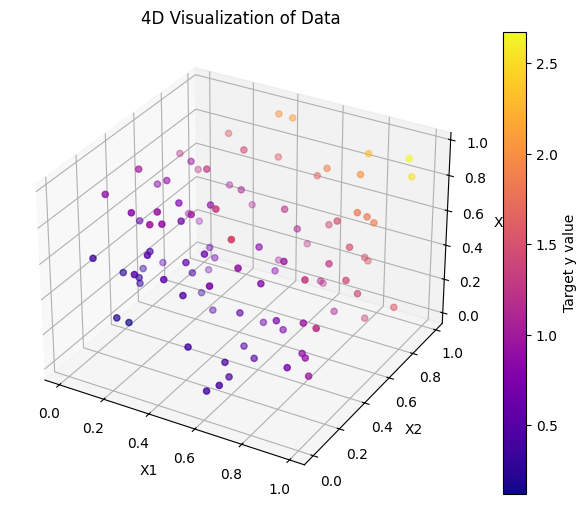

In [9]:
# 4D plot: 3D inputs (x1, x2, x3), color based on y
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], cmap='plasma')
plt.colorbar(sc, ax=ax, label='Target y value')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('4D Visualization of Data')
plt.show()
